In [1]:
'''
Importing necessary libraries for analysis
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 1: Reading and Understanding the Data

In [2]:
# Importing the required dataset
car_prices = pd.read_csv("CarPrice_Assignment.csv")
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
'''
As given in problem statement, variable named CarName is comprised of two parts - the first word is the name of 
'car company' and the second is the 'car model'. So, splitting the column to get more information
'''
car_prices.insert (3, "carCompany", car_prices["CarName"].apply(lambda x : x.split(maxsplit=1)[0]))
car_prices.insert (4, "carModel", car_prices["CarName"].apply(lambda x : x.split(maxsplit=1)[1] if " " in x else "" ))
car_prices.head()

,car_ID,symboling,CarName,carCompany,carModel,fueltype,aspiration,doornumber,carbody,drivewheel,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,giulia,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,stelvio,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,100 ls,gas,std,four,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,100ls,gas,std,four,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
'''
CarName has become redundant, since we have splitted it, and added corresponding values, so removing the same column
'''
car_prices.drop(columns=["CarName"], axis=1, inplace=True)
car_prices.head()

,car_ID,symboling,carCompany,carModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
'''
Analysing the data
'''
print("Shape of the dataset is ", car_prices.shape)
print("#############INFO##############################")
print(car_prices.info())
print("#############DESCRIBE##########################")
print(car_prices.describe())

Shape of the dataset is  (205, 27)
#############INFO##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
carCompany          205 non-null object
carModel            205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke     

### After analyzing the statistics of the dataset, we found that there are no null values present in the dataset. So, we can ignore null value imputing steps. Also, very big outliers could not be found in the dataset after going through statistics. So, we can ignore outlier detection, and removal steps too.

In [6]:
'''
Lets visualise impact of numerical variables on the prices
'''
car_prices.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### After going through correlations, I found that enginesize, curbweight, carwidth, carlength, horsepower variables have high impact on Price.

## Step 2: Visualising the Data

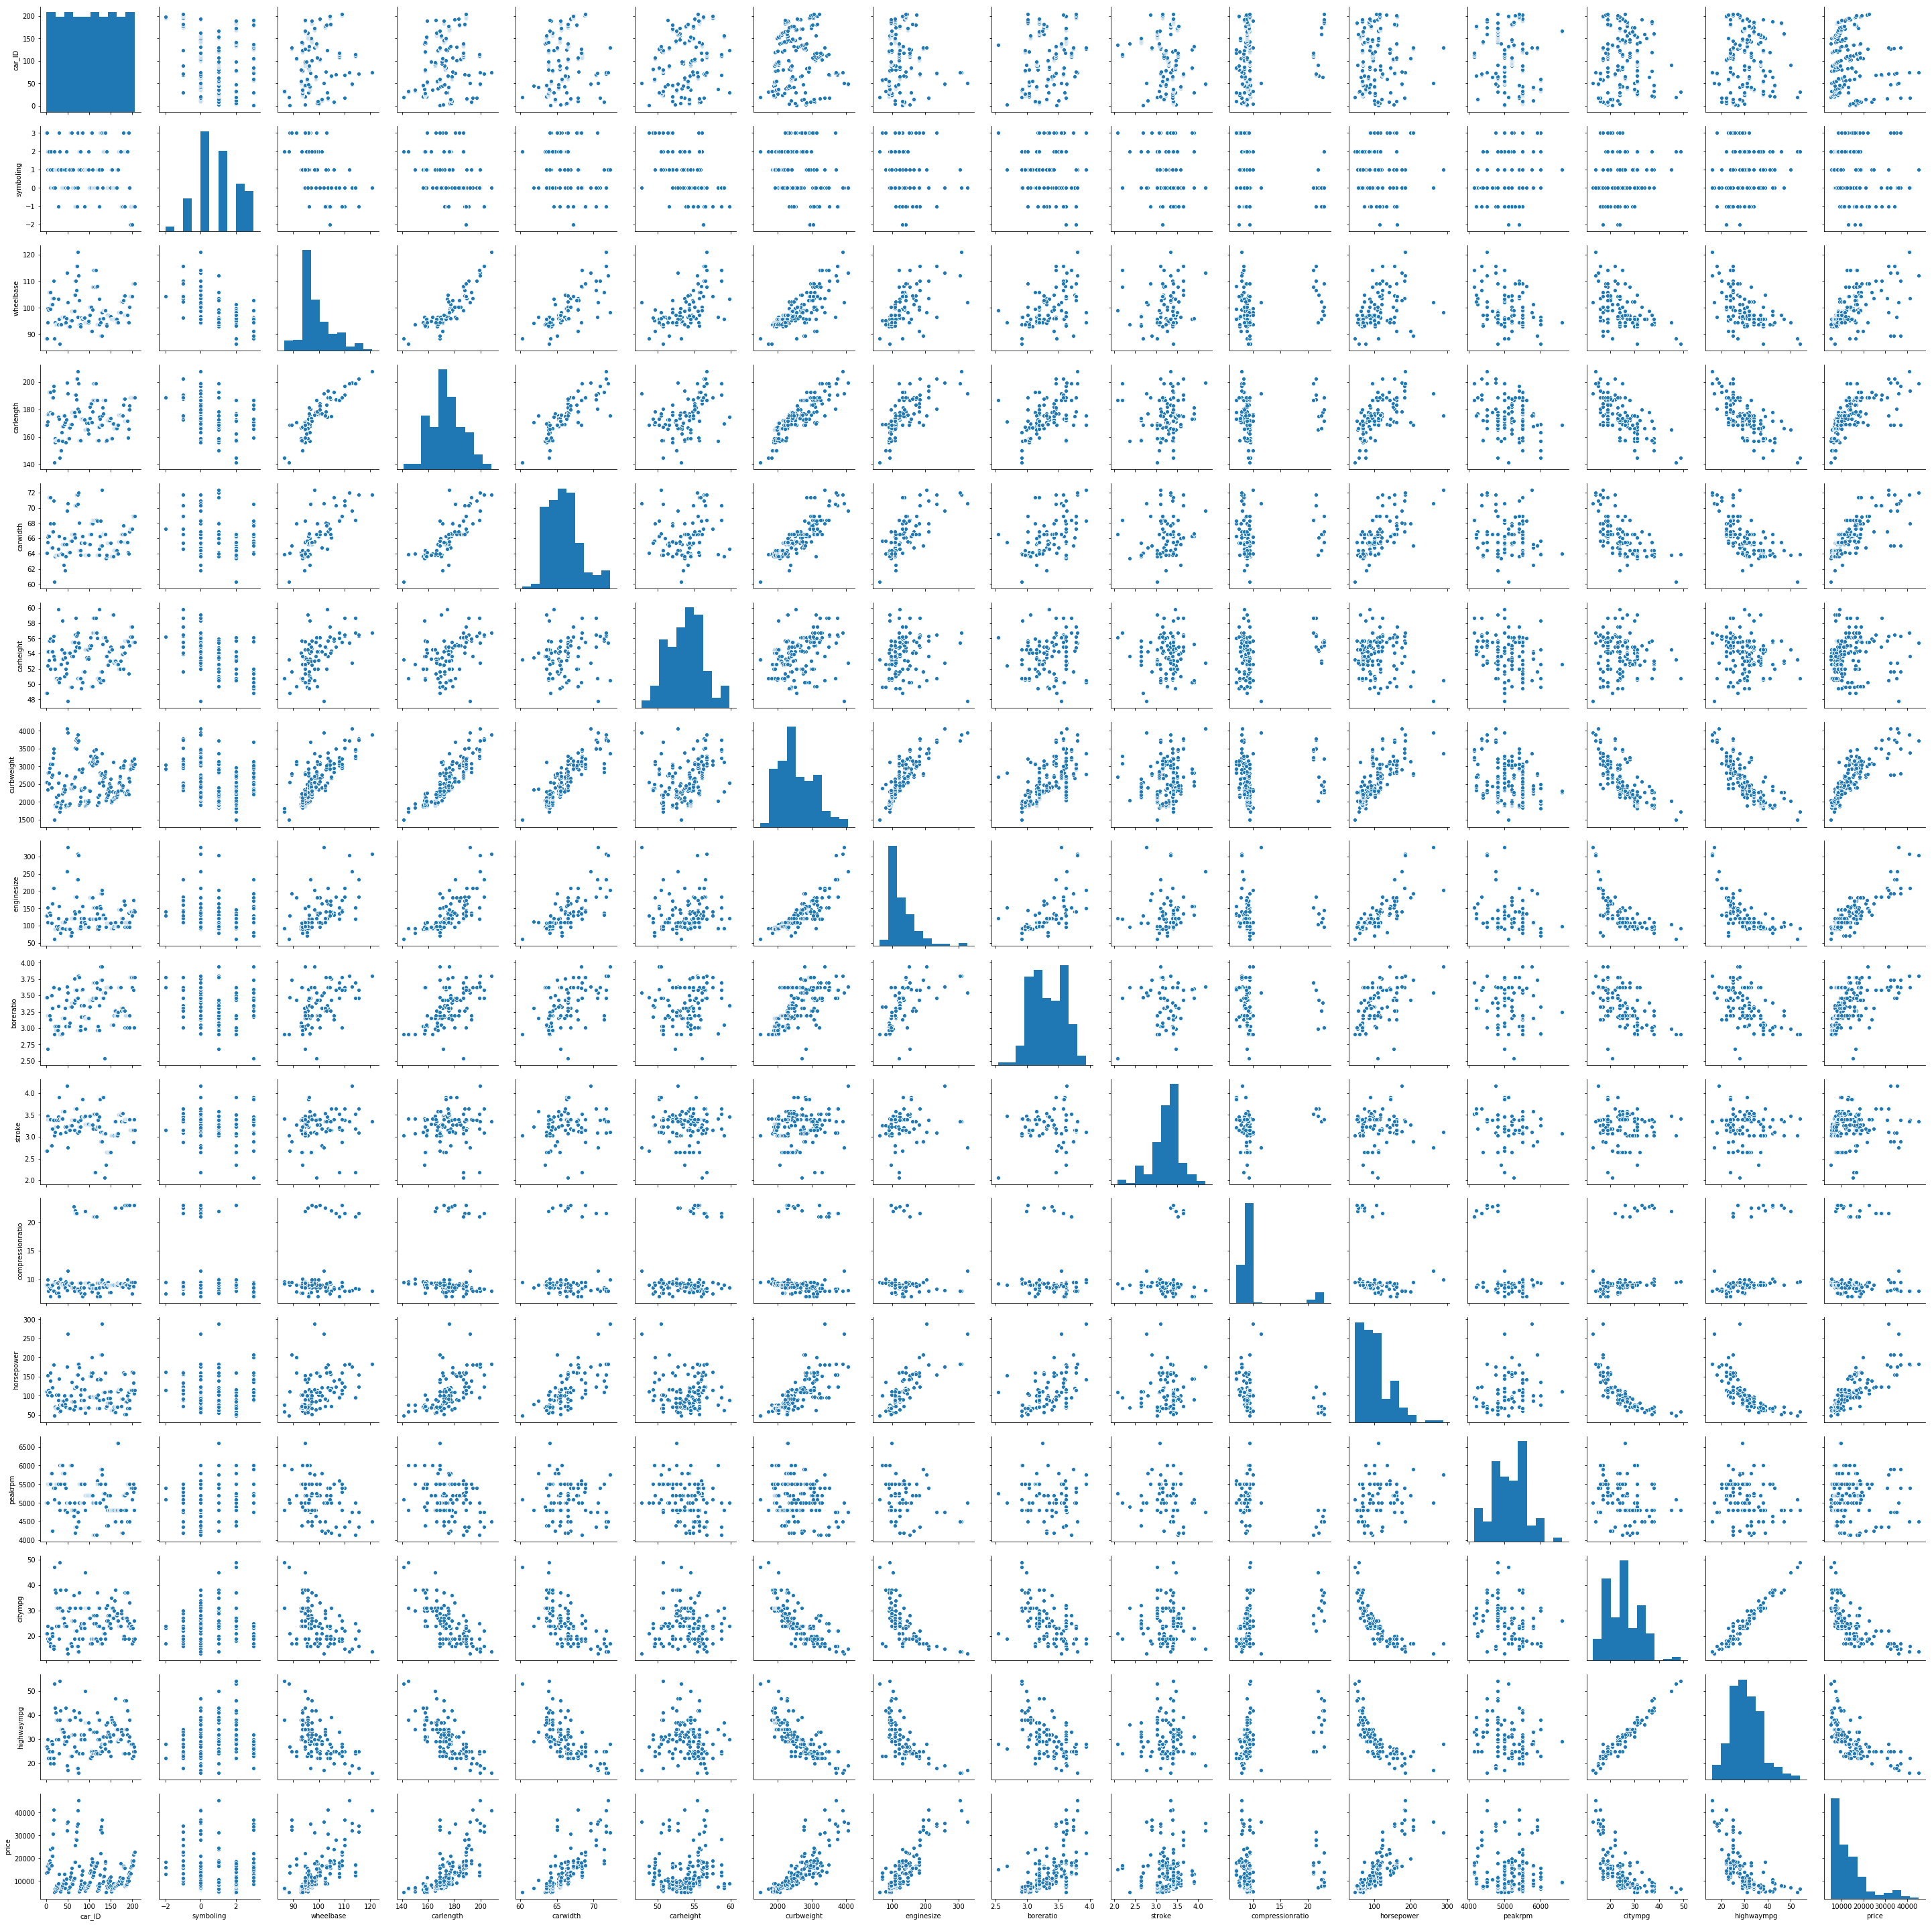

In [7]:
'''
After analysing the data, it looks like there is no null data present.
We can ignore missing value imputation procedures, and proceed further
Lets visualise the data to understand it
'''
sns.pairplot(car_prices)
plt.show()


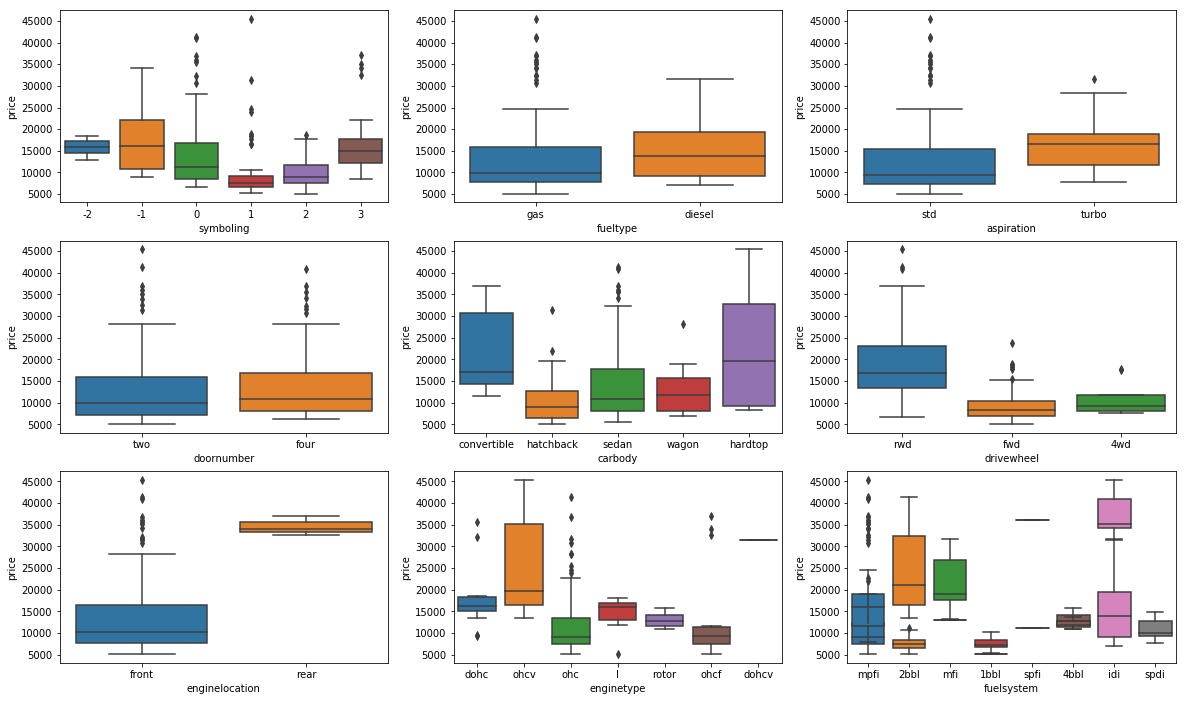

In [8]:
'''
Important insights on how price is related to various columns can be found in above figure.
Based on plots, we can tell whether a price is getting affected by respective column, and whether linear model can fit it.
For example : citympg, and highwaympg are having negative affect on price of the car.
Now visualising categorical values
'''
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
sns.boxplot(x="symboling", y="price", data=car_prices)

plt.subplot(3, 3, 2)
sns.boxplot(x="fueltype", y="price", data=car_prices)

plt.subplot(3, 3, 3)
sns.boxplot(x="aspiration", y="price", data=car_prices)

plt.subplot(3, 3, 4)
sns.boxplot(x="doornumber", y="price", data=car_prices)

plt.subplot(3, 3, 5)
sns.boxplot(x="carbody", y="price", data=car_prices)

plt.subplot(3, 3, 6)
sns.boxplot(x="drivewheel", y="price", data=car_prices)

plt.subplot(3, 3, 7)
sns.boxplot(x="enginelocation", y="price", data=car_prices)

plt.subplot(3, 3, 8)
sns.boxplot(x="enginetype", y="price", data=car_prices)

plt.subplot(3, 3, 9)
sns.boxplot(x="cylindernumber", y="price", data=car_prices)

plt.subplot(3, 3, 9)
sns.boxplot(x="fuelsystem", y="price", data=car_prices)

plt.show()


### Very glaring observation from the above plots are that cars with rear placed engines are very much costlier, then cars with front placed engines. Also, 'rwd' drivewheel cars are costlier then other type of drivewheel cars.

## Step 3: Data Preparation

In [9]:
'''
Now that, we have visualised the data, lets convert categorical values to dummy variables.
'''

print("Shape of initial dataset of car_prices is ", car_prices.shape)

symboling_dummies = pd.get_dummies( car_prices["symboling"], drop_first=True)
fueltype_dummies = pd.get_dummies( car_prices["fueltype"], drop_first=True)
aspiration_dummies = pd.get_dummies( car_prices["aspiration"], drop_first=True)
doornumber_dummies = pd.get_dummies( car_prices["doornumber"], drop_first=True)
carbody_dummies = pd.get_dummies( car_prices["carbody"], drop_first=True)
drivewheel_dummies = pd.get_dummies( car_prices["drivewheel"], drop_first=True)
enginelocation_dummies = pd.get_dummies( car_prices["enginelocation"], drop_first=True)
enginetype_dummies = pd.get_dummies( car_prices["enginetype"], drop_first=True)
cylindernumber_dummies = pd.get_dummies( car_prices["cylindernumber"], drop_first=True)
fuelsystem_dummies = pd.get_dummies( car_prices["fuelsystem"], drop_first=True)

car_prices = pd.concat([car_prices, symboling_dummies], axis=1)
print("\nShape of symboling_dummies is ", symboling_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, fueltype_dummies], axis=1)
print("\nShape of fueltype_dummies is ", fueltype_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, aspiration_dummies], axis=1)
print("\nShape of aspiration_dummies is ", aspiration_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, doornumber_dummies], axis=1)
print("\nShape of doornumber_dummies is ", doornumber_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, carbody_dummies], axis=1)
print("\nShape of carbody_dummies is ", carbody_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, drivewheel_dummies], axis=1)
print("\nShape of drivewheel_dummies is ", drivewheel_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, enginelocation_dummies], axis=1)
print("\nShape of enginelocation_dummies is ", enginelocation_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, enginetype_dummies], axis=1)
print("\nShape of enginetype_dummies is ", enginetype_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, cylindernumber_dummies], axis=1)
print("\nShape of cylindernumber_dummies is ", cylindernumber_dummies.shape)
print("Updated size of car_prices is ", car_prices.shape)

car_prices = pd.concat([car_prices, fuelsystem_dummies], axis=1)
print("\nShape of fuelsystem_dummies is ", fuelsystem_dummies.shape)
print("Updated Shape of final set of car_prices is ", car_prices.shape)


Shape of initial dataset of car_prices is  (205, 27)

Shape of symboling_dummies is  (205, 5)
Updated size of car_prices is  (205, 32)

Shape of fueltype_dummies is  (205, 1)
Updated size of car_prices is  (205, 33)

Shape of aspiration_dummies is  (205, 1)
Updated size of car_prices is  (205, 34)

Shape of doornumber_dummies is  (205, 1)
Updated size of car_prices is  (205, 35)

Shape of carbody_dummies is  (205, 4)
Updated size of car_prices is  (205, 39)

Shape of drivewheel_dummies is  (205, 2)
Updated size of car_prices is  (205, 41)

Shape of enginelocation_dummies is  (205, 1)
Updated size of car_prices is  (205, 42)

Shape of enginetype_dummies is  (205, 6)
Updated size of car_prices is  (205, 48)

Shape of cylindernumber_dummies is  (205, 6)
Updated size of car_prices is  (205, 54)

Shape of fuelsystem_dummies is  (205, 7)
Updated Shape of final set of car_prices is  (205, 61)


In [10]:
car_prices.head()

,car_ID,symboling,carCompany,carModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,0,0,0,0,0,0,0,1,0,0


In [11]:
'''
Dropping categorical columns for which dummy variables have already been added in DataFrame
Also, after going through carCompany, carModel variable values, I found out that there are data inconsistencies present in
it. Even if imputing process is applied on those variables, they are going to bring uncertainity to the final model. So, dropping these
variables too.
'''
car_prices.drop("symboling", axis=1, inplace=True)
car_prices.drop("fueltype", axis=1, inplace=True)
car_prices.drop("aspiration", axis=1, inplace=True)
car_prices.drop("doornumber", axis=1, inplace=True)
car_prices.drop("carbody", axis=1, inplace=True)
car_prices.drop("drivewheel", axis=1, inplace=True)
car_prices.drop("enginelocation", axis=1, inplace=True)
car_prices.drop("enginetype", axis=1, inplace=True)
car_prices.drop("cylindernumber", axis=1, inplace=True)
car_prices.drop("fuelsystem", axis=1, inplace=True)
car_prices.drop("carCompany", axis=1, inplace=True)
car_prices.drop("carModel", axis=1, inplace=True)
car_prices.drop("car_ID", axis=1, inplace=True)

print("Updated shape of car_prices is", car_prices.shape)


Updated shape of car_prices is (205, 48)


In [12]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
-1                  205 non-null uint8
0                   205 non-null uint8
1                   205 non-null uint8
2                   205 non-null uint8
3                   205 non-null uint8
gas                 205 non-null uint8
turbo               205 non-null uint8
two                 205 non-null uint8
hardtop             2

## Step 4: Splitting the Data into Training and Testing Sets

In [13]:
'''
Splitting the dataset into different training and testing datasets
'''
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_prices_train, car_prices_test = train_test_split(car_prices, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
'''Lets Rescale the features so that we can better understand the coefficients later'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaling to all features except dummy variables

numeric_vars = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", 
                "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

car_prices_train[numeric_vars] = scaler.fit_transform(car_prices_train[numeric_vars])
car_prices_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [15]:
# Calculating correlation coefficients
car_prices_train.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
wheelbase,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,0.224970,0.341651,0.382758,...,-0.142992,0.049113,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN
carlength,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,0.176814,0.227958,0.564588,...,-0.216024,0.122216,-0.059682,-0.502693,-0.051502,0.275886,NaN,0.501706,-0.094743,NaN
carwidth,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,0.233631,0.249516,0.685051,...,-0.210698,0.181043,-0.010753,-0.551596,-0.009279,0.293054,NaN,0.460851,-0.063850,NaN
carheight,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,0.003588,0.289830,-0.151952,...,-0.012171,-0.199022,-0.276412,-0.067042,-0.238523,0.320231,NaN,0.047857,-0.263335,NaN
curbweight,0.792815,0.881495,0.873884,0.272388,1.000000,0.865102,0.625759,0.209277,0.231862,0.759759,...,-0.162583,0.218088,-0.040089,-0.593771,-0.042573,0.288561,NaN,0.526508,-0.027766,NaN
enginesize,0.588600,0.702794,0.754925,0.045042,0.865102,1.000000,0.545157,0.228768,0.119246,0.817916,...,-0.131452,0.413197,-0.217946,-0.475134,-0.197035,0.145095,NaN,0.509074,-0.018578,NaN
boreratio,0.482386,0.620436,0.580962,0.160835,0.625759,0.545157,1.000000,-0.152836,0.116317,0.518307,...,-0.128229,0.075047,0.014733,-0.359207,0.012713,0.153727,NaN,0.399859,-0.036809,NaN
stroke,0.224970,0.176814,0.233631,0.003588,0.209277,0.228768,-0.152836,1.000000,0.212200,0.106454,...,-0.059299,-0.132053,0.002685,-0.292108,0.002317,0.265493,NaN,-0.041584,0.214983,NaN
compressionratio,0.341651,0.227958,0.249516,0.289830,0.231862,0.119246,0.116317,0.212200,1.000000,-0.130565,...,-0.012263,0.032120,-0.029274,-0.175745,-0.025262,0.983638,NaN,-0.307312,-0.148639,NaN
horsepower,0.382758,0.564588,0.685051,-0.151952,0.759759,0.817916,0.518307,0.106454,-0.130565,1.000000,...,-0.115652,0.338032,0.029774,-0.565574,-0.005741,-0.100280,NaN,0.634909,0.097530,NaN


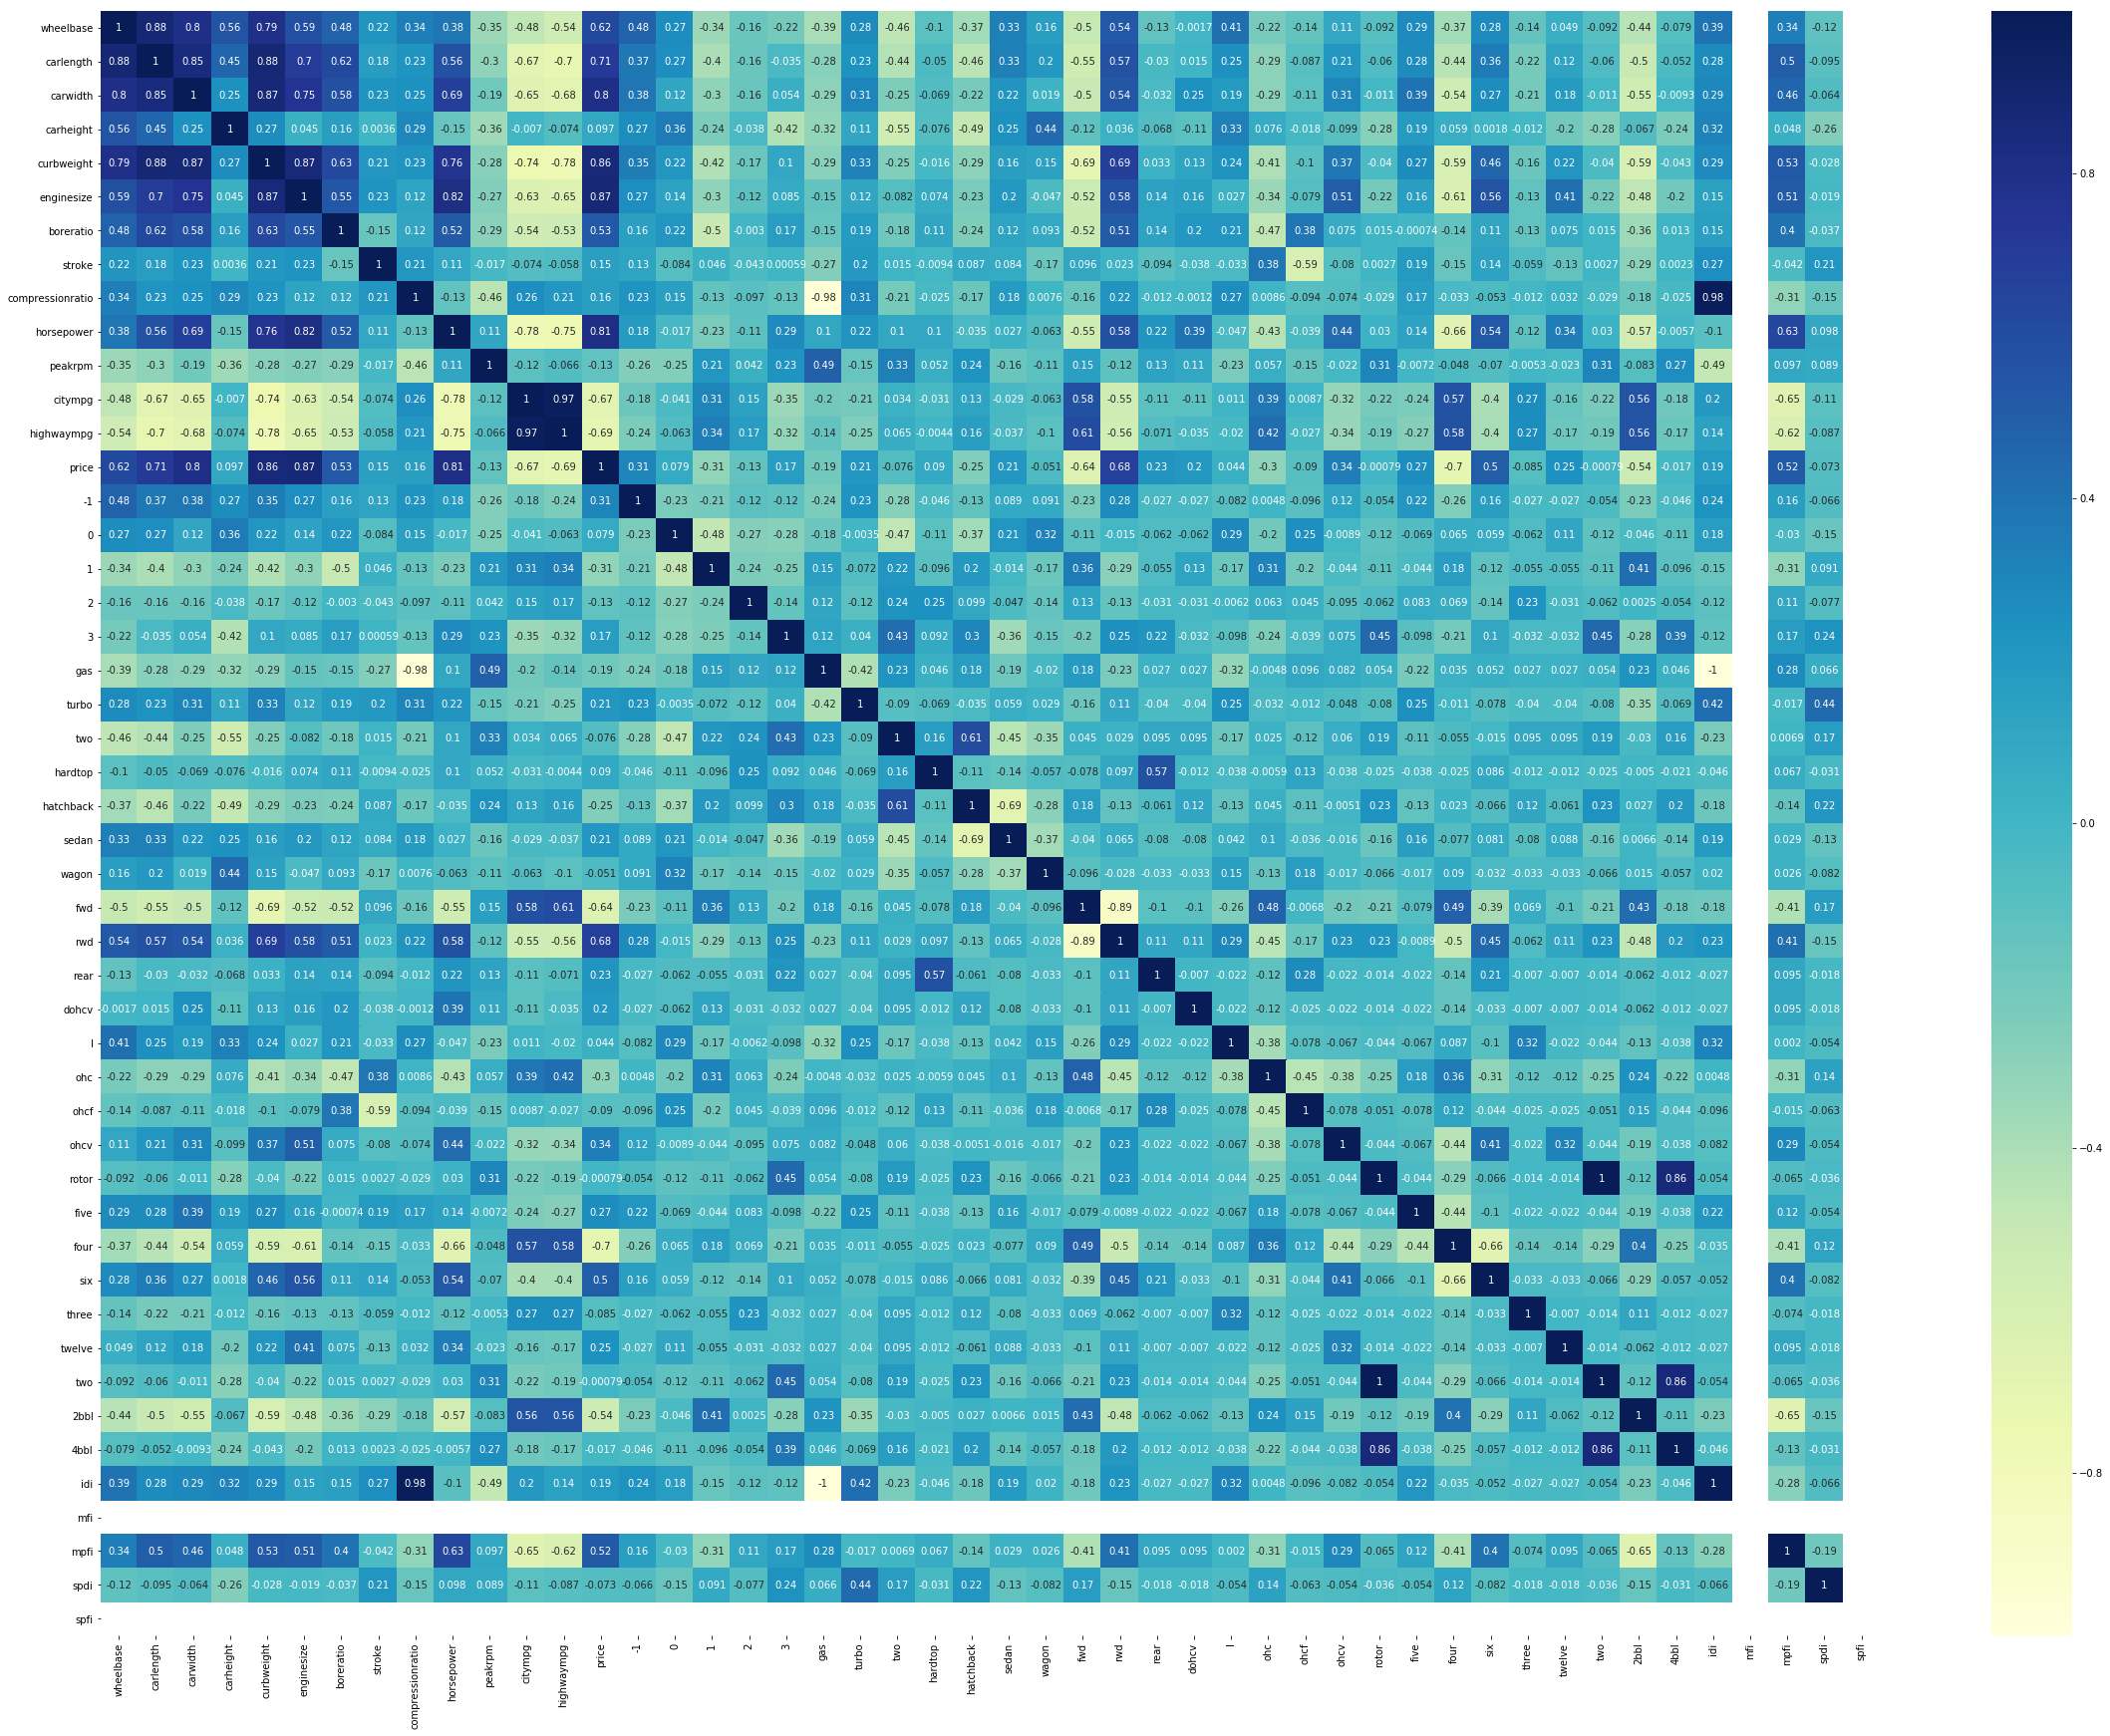

In [16]:
# Plotting correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(car_prices_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [17]:
# Making two datasets, one independent variables dataset, and one containing dependent variable
y_car_prices_train = car_prices_train.pop('price')
X_car_prices_train = car_prices_train

## Step 5: Building a linear model

In [18]:
# Importing RFE, and Linear Regression so that we can automatically pull all important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
X_car_prices_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Lets run RFE, and fetch top 10 highly correlated features
lm = LinearRegression()
lm.fit(X_car_prices_train, y_car_prices_train)
rfe=RFE(lm, 10)
rfe=rfe.fit(X_car_prices_train, y_car_prices_train)
list(zip(X_car_prices_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 18),
 ('carlength', False, 25),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 3),
 ('peakrpm', False, 8),
 ('citympg', False, 27),
 ('highwaympg', False, 20),
 (-1, False, 16),
 (0, False, 15),
 (1, False, 14),
 (2, False, 13),
 (3, False, 17),
 ('gas', False, 28),
 ('turbo', False, 22),
 ('two', False, 35),
 ('hardtop', False, 9),
 ('hatchback', False, 10),
 ('sedan', False, 12),
 ('wagon', False, 11),
 ('fwd', False, 29),
 ('rwd', False, 23),
 ('rear', True, 1),
 ('dohcv', False, 5),
 ('l', False, 33),
 ('ohc', False, 4),
 ('ohcf', False, 19),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('five', False, 32),
 ('four', False, 7),
 ('six', False, 31),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 2),
 ('2bbl', False, 36),
 ('4bbl', False, 30),
 ('idi', False, 26),
 ('mfi', False, 37),
 ('mpfi', Fa

In [21]:
# Calculating selected columns by RFE
col=X_car_prices_train.columns[rfe.support_]
print(col)

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'rear',
       'ohcv', 'rotor', 'three', 'twelve'],
      dtype='object')


In [22]:
# Now taking these variables, and building model using statsmodel for detailed statistic
# Creating X_test dataframe with RFE selected variables
X_car_prices_train_rfe = X_car_prices_train[col]

# Adding a constant variable
import statsmodels.api as sm
X_car_prices_train_rfe = sm.add_constant(X_car_prices_train_rfe)
lm=sm.OLS(y_car_prices_train, X_car_prices_train_rfe).fit()

In [23]:
# Checking the summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.81e-59
Time:                        19:01:06   Log-Likelihood:                 176.43
No. Observations:                 143   AIC:                            -330.9
Df Residuals:                     132   BIC:                            -298.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0286      0.033     -0.860      0.392      -0.094       0.037
carwidth       0.3326      0.071      4.678      0.000       0.192       0.473
curbweight     0.1438      0.086      1.682      0.095      -0.025       0.313
enginesize     1.2446      0.124     10.063      0.000       1.000       1.489
boreratio     -0.2304      0.047     -4.938      0.000      -0.323      -0.138
stroke        -0.2752      0.051     -5.345      0.000      -0.377      -0.173
rear           0.2940      0.080      3.661      0.000       0.135       0.453
ohcv          -0.1691      0.034     -4.956      0.000      -0.237      -0.102
rotor          0.2585      0.043      6.024      0.000       0.174       0.343
three          0.1883      0.075      2.495      0.014       0.039       0.338
twelve        -0.3802      0.095     -3.999      0.000      -0.568      -0.192
==============================================================================
Omnibus:                       32.410   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.791
Skew:                           0.696   Prob(JB):                     8.86e-30
Kurtosis:                       7.529   Cond. No.                         36.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# There seems to be some features present in model of less significance.
# Lets calculate VIF first, and then drop some features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Creating a dataframe of all feature variables and their VIFs
car_prices_vif = pd.DataFrame()
car_prices_vif['Features'] = X_car_prices_train_rfe.columns
car_prices_vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe.values, i) for i in 
                         range(X_car_prices_train_rfe.shape[1])]
car_prices_vif['VIF'] = round(car_prices_vif['VIF'], 2)
car_prices_vif = car_prices_vif.sort_values(by = "VIF", ascending = False)
car_prices_vif

,Features,VIF
0,const,29.37
3,enginesize,9.66
2,curbweight,8.62
1,carwidth,4.54
4,boreratio,2.47
7,ohcv,1.83
5,stroke,1.74
10,twelve,1.67
8,rotor,1.33
6,rear,1.19


In [26]:
# "enginesize" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_1 = X_car_prices_train_rfe.drop("enginesize", 1,)
X_car_prices_train_rfe_1 = sm.add_constant(X_car_prices_train_rfe_1)
lm_2=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_1).fit()
# Print the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     63.03
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.19e-43
Time:                        19:01:06   Log-Likelihood:                 135.72
No. Observations:                 143   AIC:                            -251.4
Df Residuals:                     133   BIC:                            -221.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1554      0.041     -3.815      0.0

In [27]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_1.values, i) for i in 
              range(X_car_prices_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.14
2,curbweight,5.40
1,carwidth,4.54
3,boreratio,2.21
4,stroke,1.39
6,ohcv,1.38
9,twelve,1.17
5,rear,1.05
8,three,1.05
7,rotor,1.01


In [28]:
# "curbweight" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_2 = X_car_prices_train_rfe_1.drop("curbweight", 1,)
X_car_prices_train_rfe_2 = sm.add_constant(X_car_prices_train_rfe_2)
lm_3=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_2).fit()
# Print the summary of the model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     45.37
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.57e-34
Time:                        19:01:06   Log-Likelihood:                 110.67
No. Observations:                 143   AIC:                            -203.3
Df Residuals:                     134   BIC:                            -176.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2596      0.045     -5.715      0.0

In [29]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_2.values, i) 
              for i in range(X_car_prices_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.19
1,carwidth,2.23
2,boreratio,1.89
3,stroke,1.32
5,ohcv,1.27
8,twelve,1.15
7,three,1.05
4,rear,1.04
6,rotor,1.00


In [30]:
# "stroke" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_3 = X_car_prices_train_rfe_2.drop("stroke", 1,)
X_car_prices_train_rfe_3 = sm.add_constant(X_car_prices_train_rfe_3)
lm_4=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_3).fit()
# Print the summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.84
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.05e-35
Time:                        19:01:06   Log-Likelihood:                 110.26
No. Observations:                 143   AIC:                            -204.5
Df Residuals:                     135   BIC:                            -180.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2295      0.029     -7.795      0.0

In [31]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_3.values, i) 
              for i in range(X_car_prices_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.34
1,carwidth,1.78
2,boreratio,1.60
4,ohcv,1.23
7,twelve,1.13
6,three,1.05
3,rear,1.04
5,rotor,1.00


In [32]:
# "rotor" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_4 = X_car_prices_train_rfe_3.drop("rotor", 1,)
X_car_prices_train_rfe_4 = sm.add_constant(X_car_prices_train_rfe_4)
lm_5=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_4).fit()
# Print the summary of the model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     60.85
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.97e-36
Time:                        19:01:06   Log-Likelihood:                 110.19
No. Observations:                 143   AIC:                            -206.4
Df Residuals:                     136   BIC:                            -185.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2289      0.029     -7.812      0.0

In [33]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_4.values, i) 
              for i in range(X_car_prices_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.31
1,carwidth,1.78
2,boreratio,1.60
4,ohcv,1.22
6,twelve,1.13
5,three,1.05
3,rear,1.04


In [34]:
# "boreratio" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_5 = X_car_prices_train_rfe_4.drop("boreratio", 1,)
X_car_prices_train_rfe_5 = sm.add_constant(X_car_prices_train_rfe_5)
lm_6=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_5).fit()
# Print the summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     72.61
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.34e-37
Time:                        19:01:06   Log-Likelihood:                 109.52
No. Observations:                 143   AIC:                            -207.0
Df Residuals:                     137   BIC:                            -189.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2169      0.027     -7.927      0.0

In [35]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_5.values, i) 
              for i in range(X_car_prices_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.10
3,ohcv,1.20
1,carwidth,1.17
5,twelve,1.13
4,three,1.05
2,rear,1.00


In [36]:
# "three" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_6 = X_car_prices_train_rfe_5.drop("three", 1,)
X_car_prices_train_rfe_6 = sm.add_constant(X_car_prices_train_rfe_6)
lm_7=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_6).fit()
# Print the summary of the model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     88.37
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.38e-37
Time:                        19:01:06   Log-Likelihood:                 107.77
No. Observations:                 143   AIC:                            -205.5
Df Residuals:                     138   BIC:                            -190.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2052      0.027     -7.644      0.0

In [37]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_6.values, i) 
              for i in range(X_car_prices_train_rfe_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.67
3,ohcv,1.20
4,twelve,1.13
1,carwidth,1.11
2,rear,1.00


In [38]:
# "ohcv" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_7 = X_car_prices_train_rfe_6.drop("ohcv", 1,)
X_car_prices_train_rfe_7 = sm.add_constant(X_car_prices_train_rfe_7)
lm_8=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_7).fit()
# Print the summary of the model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.51e-37
Time:                        19:01:06   Log-Likelihood:                 106.31
No. Observations:                 143   AIC:                            -204.6
Df Residuals:                     139   BIC:                            -192.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2125      0.027     -7.964      0.0

In [39]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_7.values, i) 
              for i in range(X_car_prices_train_rfe_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.47
1,carwidth,1.03
3,twelve,1.03
2,rear,1.00


In [40]:
# "twelve" has very high p-value. Lets drop this column, and recalculate our model.
X_car_prices_train_rfe_8 = X_car_prices_train_rfe_7.drop("twelve", 1,)
X_car_prices_train_rfe_8 = sm.add_constant(X_car_prices_train_rfe_8)
lm_9=sm.OLS(y_car_prices_train, X_car_prices_train_rfe_8).fit()
# Print the summary of the model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.41e-37
Time:                        19:01:07   Log-Likelihood:                 103.62
No. Observations:                 143   AIC:                            -201.2
Df Residuals:                     140   BIC:                            -192.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2209      0.027     -8.236      0.0

In [41]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_car_prices_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(X_car_prices_train_rfe_8.values, i) 
              for i in range(X_car_prices_train_rfe_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.33
1,carwidth,1.00
2,rear,1.00


## Step 7: Residual Analysis of the train data

Text(0.5, 0, 'Errors')

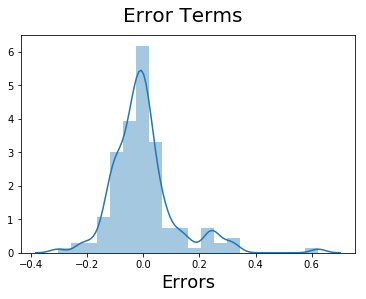

In [42]:
"""
We have removed all the unimportant features for prediction.
Lets see if the error terms are normalized.
"""
y_train_price_pred = lm_9.predict(X_car_prices_train_rfe_8)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_car_prices_train - y_train_price_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Step 8: Making Predictions Using the Final Model

In [43]:
'''
We have verified the normality of the error terms. Applying scaling on test data set too
'''
numeric_vars = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", 
                "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

car_prices_test[numeric_vars] = scaler.transform(car_prices_test[numeric_vars])
car_prices_test.describe()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Making, Test x and y dataset, and then dropping features which were dropped in Training set, and building model on it
y_car_prices_test = car_prices_test.pop('price')
X_car_prices_test = car_prices_test
X_car_prices_test.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',                 -1,                  0,
                        1,                  2,                  3,
                    'gas',            'turbo',              'two',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'rwd',
                   'rear',            'dohcv',                'l',
                    'ohc',             'ohcf',             'ohcv',
                  'rotor',             'five',             'four',
                    'six',            'three',           'twelve',
                    'two',             '2bbl',             '4bbl',
                    'idi',              'mfi',             'mp

In [45]:
selected_vars = ["carwidth", "rear"]
X_car_prices_test_sm = X_car_prices_test[selected_vars]

# Adding constant variable to test dataframe
X_car_prices_test_sm = sm.add_constant(X_car_prices_test_sm)
X_car_prices_test_sm.columns

Index(['const', 'carwidth', 'rear'], dtype='object')

In [46]:
# Making predictions using the fourth model
y_test_car_prices_pred = lm_9.predict(X_car_prices_test_sm)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_car_prices_pred')

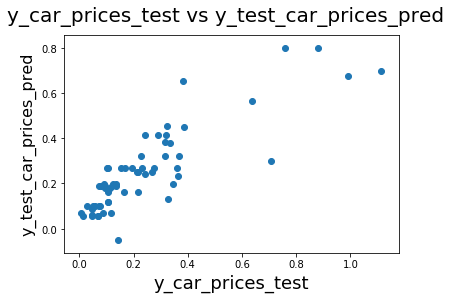

In [47]:
# Model evaluation : Plotting y_test_car_prices_pred and y_car_prices_test to understand the predicted values

fig = plt.figure()
plt.scatter(y_car_prices_test, y_test_car_prices_pred)
fig.suptitle('y_car_prices_test vs y_test_car_prices_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_car_prices_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_car_prices_pred', fontsize = 16)   

In [48]:
from sklearn.metrics import r2_score
r2_score(y_car_prices_test, y_test_car_prices_pred)

0.7203247959557431